## CNN-cifa10

In [1]:
import tensorflow as tf
import numpy as np

### 데이터 불러오기

In [2]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 218s 1us/step


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


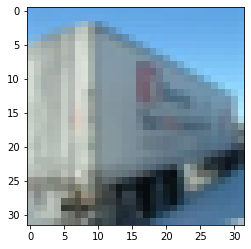

In [4]:
import matplotlib.pyplot as plt

plt.imshow(X_train[15])
plt.show()

In [5]:
# X_train = X_train / 255.0
# X_test = X_test / 255.0

In [ ]:
X_mean = np.mean(X_train, axis=(0, 1, 2))
X_std = np.std(X_train, axis=(0, 1, 2))

X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=l2(0.001)),
    MaxPool2D(pool_size=(2, 2), strides=2, padding='same',),
    Conv2D(64, 3, activation='relu', padding='same',),
    Conv2D(64, 3, activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPool2D(pool_size=(2, 2), strides=2, padding='same',),
    Conv2D(128, 3, activation='relu', padding='same',),
    Conv2D(128, 3, activation='relu', padding='same',kernel_regularizer=l2(0.001)),
    MaxPool2D(pool_size=(2, 2), strides=2, padding='same',),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizers=Adam(1e-4),
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2
                    )

In [46]:
model.evaluate(X_test, y_test, verbose=2)

10000/1 - 2s - loss: 1.0965 - acc: 0.7921


[0.9658236358642578, 0.7921]